# In Class Activity - Spotify Database - SQL Practice

Instructor: Melissa Laurino</br>
Spring 2025</br>

Name: Thinh Le</br>
Date: February 21, 2025<br>

In [69]:
# Load necessary packages:
from sqlalchemy import create_engine, inspect, text # Database navigation
import pandas as pd # Python data manilpulation

In [70]:
# Create a SQLite database and engine
db_file = "spotify_data.db"
engine = create_engine(f"sqlite:///{db_file}")

In [71]:
# Inspect the database to list the fields
inspector = inspect(engine)
columns = inspector.get_columns("spotify_history")

# Print column names
print("Columns in spotify_history table:")
for col in columns:
    print(col["name"], "-", col["type"])

Columns in spotify_history table:
ts - TEXT
platform - TEXT
ms_played - BIGINT
conn_country - TEXT
ip_addr - TEXT
master_metadata_track_name - TEXT
master_metadata_album_artist_name - TEXT
master_metadata_album_album_name - TEXT
spotify_track_uri - TEXT
episode_name - FLOAT
episode_show_name - FLOAT
spotify_episode_uri - FLOAT
audiobook_title - FLOAT
audiobook_uri - FLOAT
audiobook_chapter_uri - FLOAT
audiobook_chapter_title - FLOAT
reason_start - TEXT
reason_end - TEXT
shuffle - BOOLEAN
skipped - BOOLEAN
offline - BOOLEAN
offline_timestamp - FLOAT
incognito_mode - BOOLEAN
year - BIGINT


For practice, there are not multiple tables in this database. There is only one table named spotify_history.

Metadata for this database can be found here: https://github.com/MelissaLaurino/SpotifyStreamingHistory

View 5 records from the table:

In [72]:
with engine.connect() as connection:
    query = text("""
        SELECT *
        FROM spotify_history
        LIMIT 5;
    """)
    _5_records = pd.read_sql(query, connection)

_5_records

,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,...,audiobook_chapter_uri,audiobook_chapter_title,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode,year
0,2012-08-03 15:43:50,OS X 10.7.4 [x86 4],137760,US,134.210.225.27,Some Nights - Intro,fun.,Some Nights,spotify:track:1JAI5Ia020mdGH2wMQEacy,None,...,None,None,uriopen,trackdone,0,0,0,None,0,2012
1,2012-08-03 15:48:28,OS X 10.7.4 [x86 4],277040,US,134.210.225.27,Some Nights,fun.,Some Nights,spotify:track:6t6oULCRS6hnI7rm0h5gwl,None,...,None,None,trackdone,trackdone,0,0,0,None,0,2012
2,2012-08-03 15:50:16,OS X 10.7.4 [x86 4],108244,US,134.210.225.27,We Are Young (feat. Janelle Monáe),fun.,Some Nights,spotify:track:7a86XRg84qjasly9f6bPSD,None,...,None,None,trackdone,uriopen,0,1,0,None,0,2012
3,2012-08-03 15:50:31,OS X 10.7.4 [x86 4],16015,US,134.210.225.27,Trip to Your Heart,Britney Spears,Femme Fatale (Deluxe Version),spotify:track:2qbhijQG7phGVHkPt22fTP,None,...,None,None,uriopen,uriopen,0,1,0,None,0,2012
4,2012-08-03 15:53:53,OS X 10.7.4 [x86 4],73786,US,134.210.225.27,Stan,Eminem,The Marshall Mathers LP,spotify:track:3UmaczJpikHgJFyBTAJVoz,None,...,None,None,uriopen,popup,0,1,0,None,0,2012


We can use COUNT( * ) to summarize and count occurrences in SQL. Use COUNT( * ) below:

Query 1: <br>
Find the top 30 artists listened to in the year 2024.

In [73]:
with engine.connect() as connection:
    query = text("""
        SELECT master_metadata_album_artist_name AS artist, SUM(ms_played) AS minutes_played
        FROM spotify_history
        WHERE year = 2024
        GROUP BY artist
        ORDER BY minutes_played DESC
        LIMIT 30;
    """)
    top_30_artists_in_2024 = pd.read_sql(query, connection)

top_30_artists_in_2024

,artist,minutes_played
0,Miley Cyrus,78474617
1,Hozier,69569831
2,Ariana Grande,50421190
3,Eminem,46579575
4,Lady Gaga,42544566
5,Sabrina Carpenter,42378543
6,Noah Kahan,37403553
7,Teddy Swims,28992658
8,Billie Eilish,28667146
9,CIL,27410642


Query 2: <br>
Find the top 30 songs listened to in the year 2017.

In [74]:
with engine.connect() as connection:
    query = text("""
        SELECT master_metadata_track_name AS track_name, COUNT(*) AS play_count
        FROM spotify_history
        WHERE year = 2017
        GROUP BY track_name
        ORDER BY play_count DESC
        LIMIT 30;
    """)
    top_30_songs_in_2017 = pd.read_sql(query, connection)

top_30_songs_in_2017

,track_name,play_count
0,Malibu,223
1,Close,150
2,Shape of You,147
3,It Ain’t Me (with Selena Gomez),117
4,Take Me Down,95
5,Rainbow,95
6,Havana (feat. Young Thug),95
7,Week Without You,88
8,Anyway,86
9,Love Someone,82


Query 3: Find all songs of Miley Cyrus that have been listened to<br>

In [75]:
with engine.connect() as connection:
    query = text("""
        SELECT master_metadata_album_artist_name AS artist, master_metadata_track_name AS track_name, COUNT(*) AS play_count
        FROM spotify_history
        WHERE artist = 'Miley Cyrus'
        GROUP BY artist, track_name
        ORDER BY play_count DESC
    """)
    miley_cyrus_songs = pd.read_sql(query, connection)

miley_cyrus_songs

,artist,track_name,play_count
0,Miley Cyrus,Malibu,510
1,Miley Cyrus,Slide Away,390
2,Miley Cyrus,Angels Like You,366
3,Miley Cyrus,Prisoner (feat. Dua Lipa),229
4,Miley Cyrus,Flowers,210
...,...,...,...
176,Miley Cyrus,Malibu - Lost Frequencies Remix,1
177,Miley Cyrus,Malibu - The Him Remix,1
178,Miley Cyrus,"The Climb - From ""Hannah Montana The Movie""",1
179,Miley Cyrus,The Climb - Stripped,1


I'm glad that some of the songs I know are in the result like "We can't stop", "Wrecking ball", "Flowers" and "Angels like you".

In [76]:
#Disconnect from the database. Always remember to disconnect :) 
connection.close()

# Assignment #5 - Data Gathering and Warehousing - DSSA-5102

<b>Only Murders in the...Database?</b><br>
An introduction to navigating SQL databases using R and Jupyter Notebook. <br>
<br>
Congrats! You have solved the murder from Assignment #4, let's practice more queries in SQL City! <br>
<br>
Your task for <b>Assignment #5</b> is to complete the following objectives:<br>
You are a data scientist that was hired by SQL City. Your objectives are as follows:<br>
- Objective 1: The town is willing to fund more training for officers in SQL City based on the type of crime that is most committed. The training would help them identify the clues that indicate these two types upon arrival on a crime scene. As a data scientist, what crime type would you advise needs more training for officers in SQL city? What crime was committed the most in SQL City within the database date range? Save your query as a dataframe and quickly add a ggplot2 bar graph visual to support your recommendation.<br>
- Objective 2: The town has also received more funding to encourage DOUBLE overtime for officers in SQL City during the month with the highest crime rate through out the date range of the database. What month would you advise the town to encourage officer overtime? <br>
- Objective 3: To thank the officers for their extra training and overtime, the town will pay for their monthly gym membership. They want to give the officers the membership that the least amount of civilians have to avoid being recognized daily as the town heros. The membership can be used in any town. What membership does the town give them?<br><br>
<b>--</b>Add detailed comments to explain EVERY query or SQL command you use while we are still learning and practicing. I have my steps outlined, but please add more cells inbetween for additional queries! There is no limit on the number of queries you can use. <br>
<b>--</b>For each query include comments such as "SELECT all records FROM table WHERE column name = X"<br>
<b>--</b>Answer the prompts in markdown cells. Justify your response. A simple yes/no answer will receive no credit.<br>

Recommended Readings: Chapters 4-7 in Getting Started with SQL by Thomas Nield<br><br>

SQL Dictionary: https://www.w3schools.com/sql/sql_ref_join.asp

This fabulous database was created by @NUKnightLab on Github and can be found here: https://github.com/NUKnightLab/sql-mysteries


In [77]:
# Load additional packages:
import matplotlib.pyplot as plt
import seaborn as sb

In [78]:
# Connect to our .db file
db_file = "sql-murder-mystery.db"
engine = create_engine(f"sqlite:///{db_file}")

We can use the COUNT command to explore our queries further. COUNT will count the number of records that meet the specified criteria.
Additional examples using COUNT: https://www.w3schools.com/sql/sql_count.asp

In [79]:
# Practice analyzing COUNTS in data tables with SQL queries:
# Brainstorming for Objective 1
# We can find the top ten cities within our Murder Mystery database that had the most crimes by using the COUNT SQL command.
# SELECT the cities that have the most counts within the table crime_scene_report and
# GROUP the results BY city and ORDER BY a DESC count, only show a limit of 10 records:

# Establish a connection
with engine.connect() as connection:
    # Define the query as text
    query = text("""
        SELECT city, COUNT(*) AS count
        FROM crime_scene_report
        GROUP BY city
        ORDER BY count DESC
        LIMIT 10
    """)
    # Use pandas to read the sql query with the connection to the database
    top_10_crime_cities = pd.read_sql(query, connection)

top_10_crime_cities

# Looks like SQL City and Murfreesboro have the highest number of crimes!
# Use COUNT(*) as count to determine the answers to the objectives below.

,city,count
0,SQL City,9
1,Murfreesboro,9
2,Toledo,8
3,Jersey City,8
4,Evansville,8
5,Duluth,8
6,Wilmington,7
7,Waterbury,7
8,Reno,7
9,Portsmouth,7


<b>Objective 1:</b> The town is willing to fund more training for officers in SQL City based on the type of crime that is most committed. The training would help them identify the clues that indicate these two types upon arrival on a crime scene. As a data scientist, what crime type would you advise needs more training for officers in SQL city? What crime was committed the most in SQL City within the database date range? Save your query as a dataframe and quickly add a bar graph visual to support your recommendation.

In [80]:
# Query the database to count the number of crimes by type in SQL City.
# Sort the crimes in descending order to identify the most committed.

# Establish a connection
with engine.connect() as connection:
    # Define the query as text
    query = text("""
        SELECT type AS crime_type, COUNT(*) AS count
        FROM crime_scene_report
        WHERE city = 'SQL City'
        GROUP BY crime_type
        ORDER BY count DESC
    """)
    # Use pandas to read the sql query with the connection to the database
    top_crime_types = pd.read_sql(query, connection)

top_crime_types

,crime_type,count
0,murder,3
1,assault,2
2,theft,1
3,robbery,1
4,bribery,1
5,arson,1


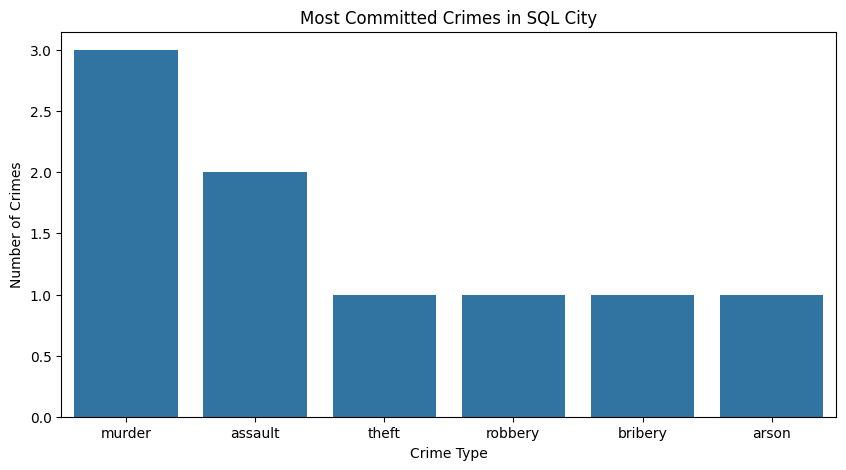

In [81]:
# Graph your results:

# Create the figure with size
plt.figure(figsize=(10,5))

# Create a bar plot using the seaborn library
sb.barplot(x='crime_type', y='count', data=top_crime_types)

# Labels and title
plt.xlabel("Crime Type")
plt.ylabel("Number of Crimes")
plt.title("Most Committed Crimes in SQL City")

# Show the plot
plt.show()

Answer: From the query result and from the graph, **murder** is the crime that committed the most in SQL City. So I would recommend it as the training for officers in SQL city.

<b>Objective 2:</b> The town has also received more funding to encourage DOUBLE overtime for officers in SQL City during the month with the highest crime rate through out the date range of the database. What month would you advise the town to encourage officer overtime?

Since the dates are stored as integer, we can do a simple math with numbers by dividing the date by 100. This means removing the day value, only keep the year and month.

In [82]:
# Establish a connection
with engine.connect() as connection:
    # Define the query as text
    query = text("""
        SELECT date / 100 AS year_and_month, COUNT(*) AS count
        FROM crime_scene_report
        WHERE city = 'SQL City'
        GROUP BY year_and_month
        ORDER BY count DESC
    """)
    # Use pandas to read the sql query with the connection to the database
    highest_crime_by_month = pd.read_sql(query, connection)

highest_crime_by_month

,year_and_month,count
0,201801,4
1,201802,2
2,201711,1
3,201708,1
4,201707,1


Answer: Based on the result, I would recommend the officers to work overtime in January of 2018.

<b>Objective 3:</b> To thank the officers for their extra training and overtime, the town will pay for their monthly gym membership. They want to give the officers the membership that the least amount of civilians have to avoid being recognized daily as the town heros. The membership can be used in any town. What membership does the town give them?

In [83]:
# Establish a connection
with engine.connect() as connection:
    # Define the query as text
    query = text("""
        SELECT membership_status, COUNT(*) AS count
        FROM get_fit_now_member
        GROUP BY membership_status
        ORDER BY count
    """)
    # Use pandas to read the sql query with the connection to the database
    least_gym_membership = pd.read_sql(query, connection)

least_gym_membership

,membership_status,count
0,regular,53
1,silver,63
2,gold,68


Answer: Regular is the membership that the town should give the officers

In [84]:
#Disconnect from the database. Always remember to disconnect :)
connection.close()